In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

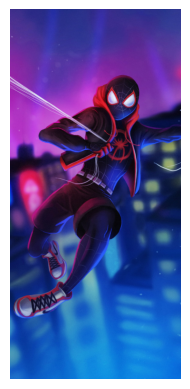

In [29]:
imagen = cv2.imread("spiderman.jpg")
imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
plt.imshow(imagen)
plt.axis('off')
plt.show()

# Problema 1

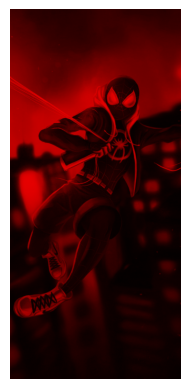

In [30]:
def activar_canales(imagen, color):
    img_modificada = imagen.copy()
    
    # Canales en 0
    if color == 1:
        img_modificada[:, :, 1] = 0
        img_modificada[:, :, 2] = 0
    elif color == 2:
        img_modificada[:, :, 0] = 0
        img_modificada[:, :, 2] = 0
    elif color == 3:
        img_modificada[:, :, 0] = 0
        img_modificada[:, :, 1] = 0
    elif color == 10:
        img_modificada[:, :, 0] = 0
    elif color == 20:
        img_modificada[:, :, 2] = 0
    elif color == 30:
        img_modificada[:, :, 1] = 0
    
    return img_modificada

plt.imshow(activar_canales(imagen, 1))
plt.axis('off')
plt.show()

# Problema 2

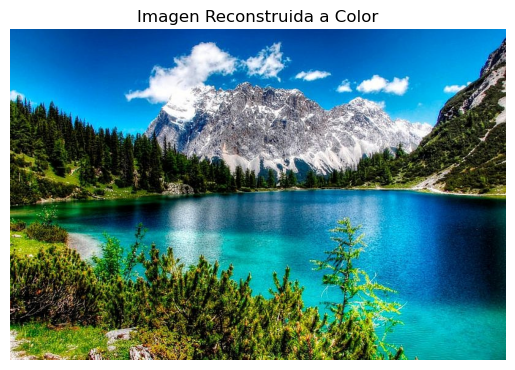

In [27]:
def reconstruir_imagen_color(imagen1, imagen2, imagen3):
	if imagen1.shape != imagen2.shape or imagen1.shape != imagen3.shape:
			raise ValueError("Las imágenes deben tener las mismas dimensiones.")

	imagen_color = np.zeros((imagen1.shape[0], imagen1.shape[1], 3), dtype=np.uint8)
	
	imagen_color[:, :, 2] = imagen1  # Canal rojo
	imagen_color[:, :, 1] = imagen2  # Canal verde
	imagen_color[:, :, 0] = imagen3  # Canal azul
	
	return imagen_color

imagen_rojo = cv2.imread('imagen1/imagen1_salida_gray_rojo.jpg', cv2.IMREAD_GRAYSCALE)
imagen_verde = cv2.imread('imagen1/imagen1_salida_gray_verde.jpg', cv2.IMREAD_GRAYSCALE)
imagen_azul = cv2.imread('imagen1/imagen1_salida_gray_azul.jpg', cv2.IMREAD_GRAYSCALE)


imagen_color = reconstruir_imagen_color(imagen_rojo, imagen_verde, imagen_azul)

plt.imshow(cv2.cvtColor(imagen_color, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


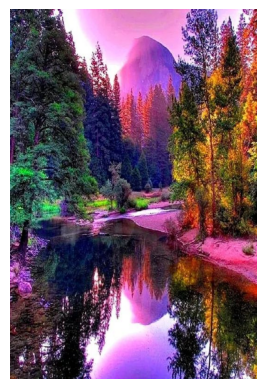

In [31]:
imagen_rojo = cv2.imread('imagen2/imagen2_salida_gray_rojo.jpg', cv2.IMREAD_GRAYSCALE)
imagen_verde = cv2.imread('imagen2/imagen2_salida_gray_verde.jpg', cv2.IMREAD_GRAYSCALE)
imagen_azul = cv2.imread('imagen2/imagen2_salida_gray_azul.jpg', cv2.IMREAD_GRAYSCALE)


imagen_color = reconstruir_imagen_color(imagen_rojo, imagen_verde, imagen_azul)

plt.imshow(cv2.cvtColor(imagen_color, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

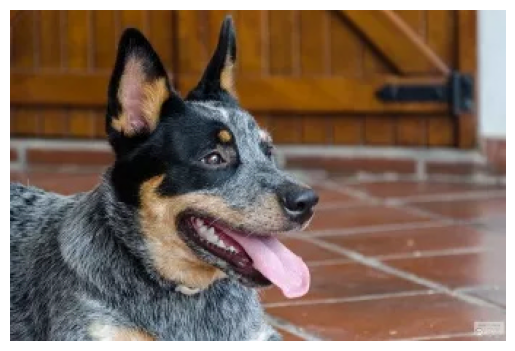

In [32]:
imagen_rojo = cv2.imread('perro/perro_salida_gray_rojo.jpg', cv2.IMREAD_GRAYSCALE)
imagen_verde = cv2.imread('perro/perro_salida_gray_verde.jpg', cv2.IMREAD_GRAYSCALE)
imagen_azul = cv2.imread('perro/perro_salida_gray_azul.jpg', cv2.IMREAD_GRAYSCALE)


imagen_color = reconstruir_imagen_color(imagen_rojo, imagen_verde, imagen_azul)

plt.imshow(cv2.cvtColor(imagen_color, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Problema 3

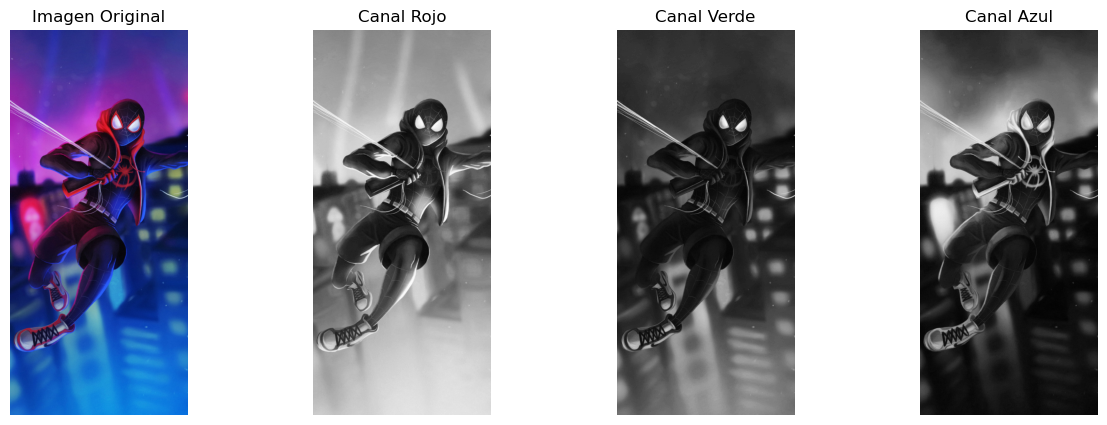

In [35]:
def crear_escala_grises_3d(imagen_color):
	canal_azul, canal_verde, canal_rojo = cv2.split(imagen_color)
	
	return canal_rojo, canal_verde, canal_azul

imagen_rojo, imagen_verde, imagen_azul = crear_escala_grises_3d(imagen)

cv2.imwrite('imagen_rojo.jpg', imagen_rojo)
cv2.imwrite('imagen_verde.jpg', imagen_verde)
cv2.imwrite('imagen_azul.jpg', imagen_azul)

plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(imagen)
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(imagen_rojo, cmap='gray')
plt.title('Canal Rojo')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(imagen_verde, cmap='gray')
plt.title('Canal Verde')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(imagen_azul, cmap='gray')
plt.title('Canal Azul')
plt.axis('off')

plt.show()


# Problema 4

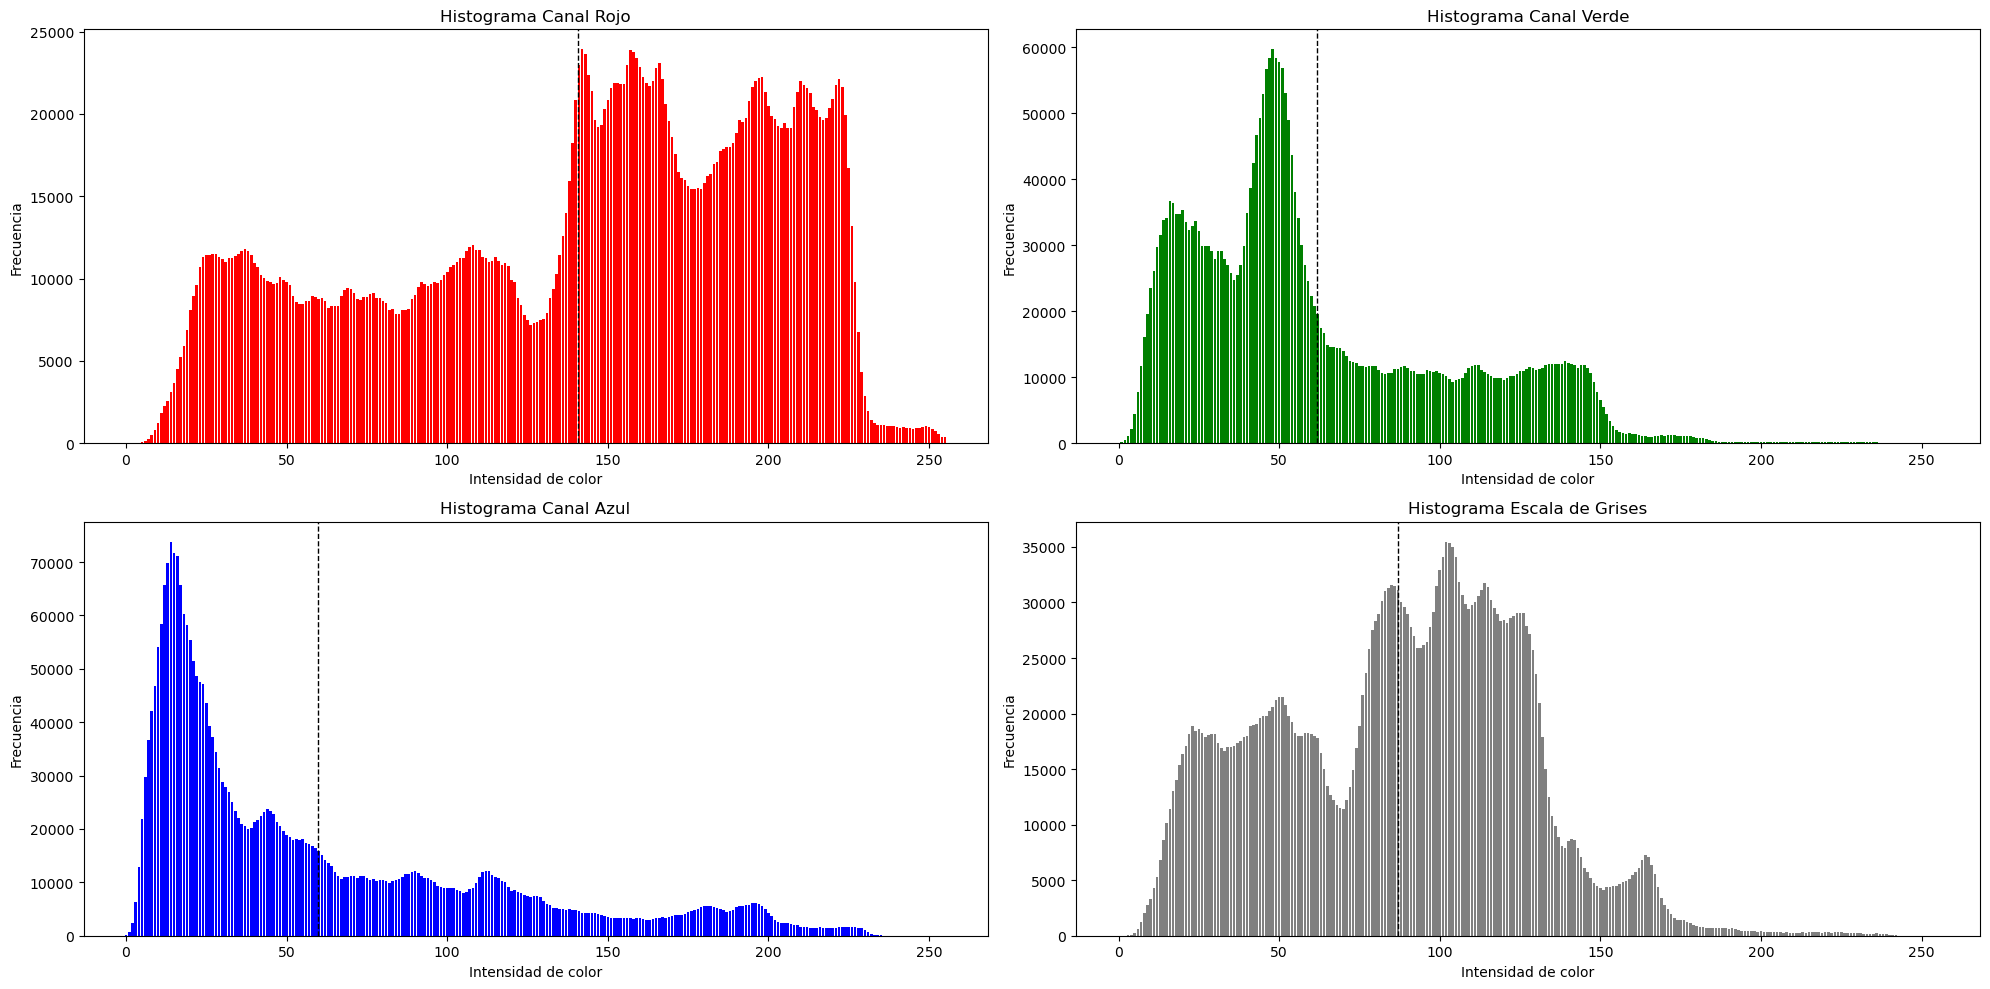

In [38]:
def calcular_histograma(canal):
	histograma = np.zeros(256, dtype=int)
	for valor in canal.flatten():
			histograma[valor] += 1
	return histograma

def mostrar_histogramas(imagen):
	canal_azul, canal_verde, canal_rojo = cv2.split(imagen)
	
	imagen_gris = np.mean(imagen, axis=2).astype(np.uint8)
	
	histograma_rojo = calcular_histograma(canal_rojo)
	histograma_verde = calcular_histograma(canal_verde)
	histograma_azul = calcular_histograma(canal_azul)
	histograma_gris = calcular_histograma(imagen_gris)
	
	media_rojo = np.mean(canal_rojo)
	media_verde = np.mean(canal_verde)
	media_azul = np.mean(canal_azul)
	media_gris = np.mean(imagen_gris)
	
	plt.figure(figsize=(20, 10))
	
	plt.subplot(2, 2, 1)
	plt.bar(range(256), histograma_rojo, color='red')
	plt.axvline(media_rojo, color='black', linestyle='dashed', linewidth=1)
	plt.title('Histograma Canal Rojo')
	plt.xlabel('Intensidad de color')
	plt.ylabel('Frecuencia')
	
	plt.subplot(2, 2, 2)
	plt.bar(range(256), histograma_verde, color='green')
	plt.axvline(media_verde, color='black', linestyle='dashed', linewidth=1)
	plt.title('Histograma Canal Verde')
	plt.xlabel('Intensidad de color')
	plt.ylabel('Frecuencia')
	
	plt.subplot(2, 2, 3)
	plt.bar(range(256), histograma_azul, color='blue')
	plt.axvline(media_azul, color='black', linestyle='dashed', linewidth=1)
	plt.title('Histograma Canal Azul')
	plt.xlabel('Intensidad de color')
	plt.ylabel('Frecuencia')
	
	plt.subplot(2, 2, 4)
	plt.bar(range(256), histograma_gris, color='gray')
	plt.axvline(media_gris, color='black', linestyle='dashed', linewidth=1)
	plt.title('Histograma Escala de Grises')
	plt.xlabel('Intensidad de color')
	plt.ylabel('Frecuencia')
	
	plt.tight_layout()
	plt.show()

mostrar_histogramas(imagen)


# Problema 5

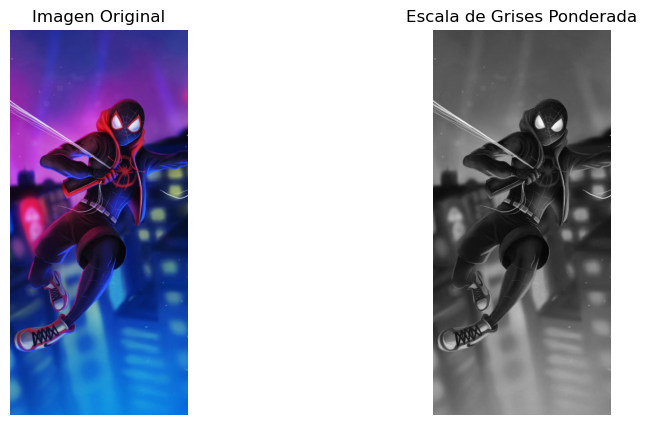

In [39]:
def convertir_a_grises_ponderado(imagen_color):
	imagen_rgb = cv2.cvtColor(imagen_color, cv2.COLOR_BGR2RGB)
	
	canal_rojo, canal_verde, canal_azul = cv2.split(imagen_rgb)
	
	imagen_gris_ponderada = (0.299 * canal_rojo + 0.587 * canal_verde + 0.114 * canal_azul).astype(np.uint8)
	
	return imagen_gris_ponderada


imagen_gris_ponderada = convertir_a_grises_ponderado(imagen)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(imagen)
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imagen_gris_ponderada, cmap='gray')
plt.title('Escala de Grises Ponderada')
plt.axis('off')

plt.show()


# Problema 6

El modelo HSV es un sistema de color en el que el espacio se representa mediante un cono: tono, saturacion y valor.

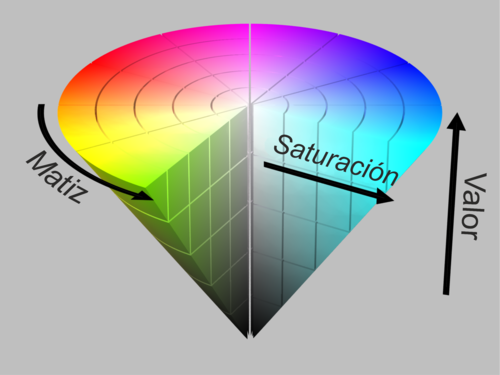

Tono: Se representa como un grado de ángulo cuyos valores posibles van de 0 a 360° (aunque para algunas aplicaciones se normalizan del 0 al 100%). Cada valor corresponde a un color. Ejemplos: 0 es rojo, 60 es amarillo y 120 es verde.

Saturacion: Se representa como la distancia al eje de brillo negro-blanco. Los valores posibles van del 0 al 100%. Cuanto menor sea la saturación de un color, mayor tonalidad grisácea habrá y más decolorado estará.

Valor: Representa la altura en el eje blanco-negro. Los valores posibles van del 0 al 100%. 0 siempre es negro. Dependiendo de la saturación, 100 podría ser blanco o un color más o menos saturado.